# 1. Import modules into script

In [35]:
# First import the modules in

import numpy as np
import math
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.colors as colors
from astropy.modeling import models, fitting

# 2. Read in the files

In [34]:
# Reading in the Fits files

imgfile='/data/nemesis/GBdata/spex2/2018feb15/images/2.16/jupiter/jcf0039500403.gz'
mapfile='/data/nemesis/GBdata/spex2/2018feb15/images/2.16/jupiter/jcf0039500403.cmap.gz'
mufile='/data/nemesis/GBdata/spex2/2018feb15/images/2.16/jupiter/jcf0039500403.mu.gz'


# Opening the fits files and giving them a header

with fits.open(imgfile) as hdu:
    image = hdu[0].data
    hdr = hdu[0].header
with fits.open(mapfile) as hdu:
    cmap = hdu[0].data
with fits.open(mufile) as hdu:
    mu = hdu[0].data
    
    
# Dating the files and givng dimensions

print(imgfile,hdr['DATE_OBS'],hdr['TIME_OBS'])

cx=hdr['CX']
cy=hdr['CY']

print(hdr['CX'])
print(hdr['MJD_OBS'])
print(hdr['INSTRUME'])


/data/nemesis/GBdata/spex2/2018feb15/images/2.16/jupiter/jcf0039500403.gz 2018-02-15 16:06:43.375
230.693
58164.6706498545
SpeX Imager


# 3. Displaying the Images

## 3.1 Standard image

-564.7981567382812 7297.4126953125
230 296


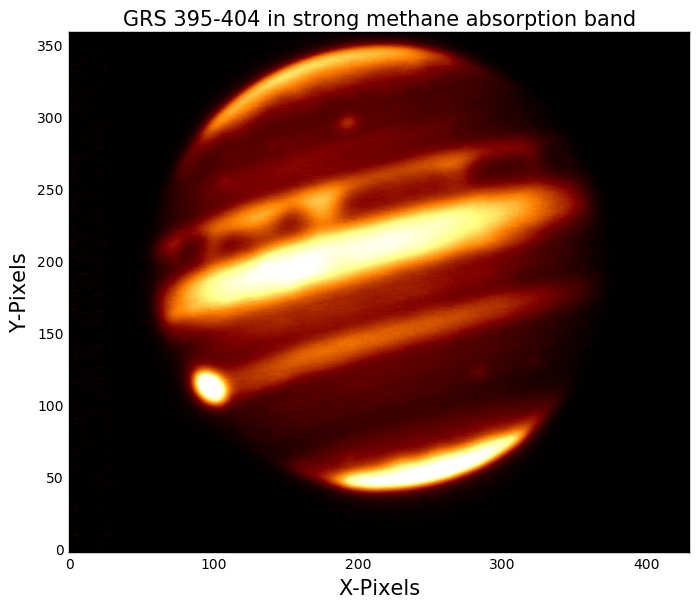

In [4]:
# Find and set dimensions
fig,axs=plt.subplots(1,1,figsize=(8,8))
ax=axs
dim=image.shape

print(np.min(image),np.max(image))

# Crop the data to focus on Jupiter:
print(math.floor(cx),math.floor(cy))

x1=math.floor(cx)-130
x2=math.floor(cx)+230
y1=math.floor(cy)-280
y2=math.floor(cy)+150

im1=image[x1:x2,y1:y2]


# Adjust the contrast and apply a filter
imgplot = ax.imshow(im1,cmap='afmhot',vmin=0.0,vmax=5000,origin='top') 

# Plot the image, label diagram and save image 
axs.set_xlabel('X-Pixels',size=15)
axs.set_ylabel('Y-Pixels',size=15)
axs.set_title('GRS 395-404 in strong methane absorption band',size=15)
plt.show()

fig.savefig("GRS_395-404.png")

## 3.2 Cylindrical Map

-27.147312 7255.1416


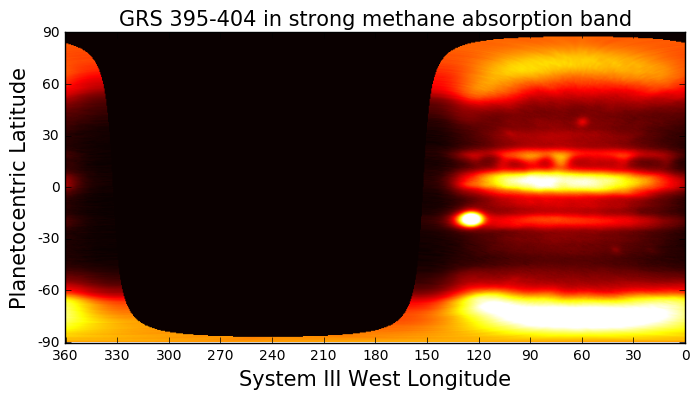

In [5]:
# Find and set dimensions
fig,axs=plt.subplots(1,1,figsize=(8,8))
ax=axs
dim=cmap.shape

print(np.min(cmap),np.max(cmap))

# Adjust the contrast and apply a filter
imgplot = ax.imshow(cmap,cmap='hot',vmin=0.0,vmax=5000,origin='top') 

# Set x and y ticks 
plt.xticks(np.arange(0,len(cmap[0])+1, step=60),list(np.arange(360,-1,-30)))
plt.yticks(np.arange(0,len(cmap)+1, step=60),list(np.arange(-90,91,30)))

# Plot the Cmap, label diagram and save image
axs.set_xlabel('System III West Longitude',size=15)
axs.set_ylabel('Planetocentric Latitude',size=15)
axs.set_title('GRS 395-404 in strong methane absorption band',size=15)
plt.show()

fig.savefig("GRS_395-404_cmap.png")


## 3.3 Cylindrical Map - Limb corrected

/cm/shared/apps/python/intelpython3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide
/cm/shared/apps/python/intelpython3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


nan nan


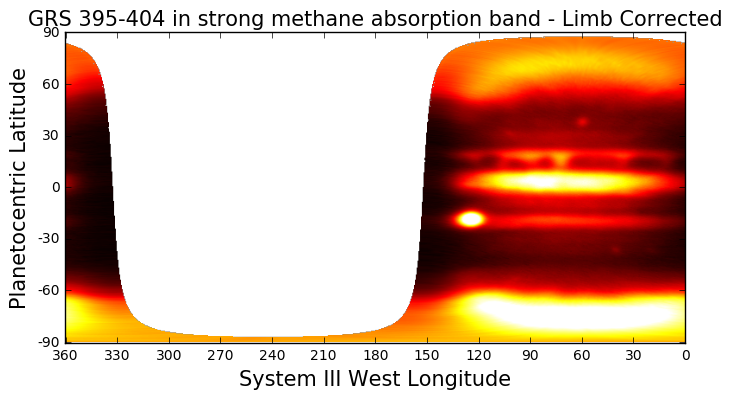

In [6]:
# Find and set dimensions
fig,axs=plt.subplots(1,1,figsize=(8,8))
ax=axs

    # Mu is the cosine of the emission angle.
    # Divide by mu^p (where p is an arbitrary power).
pdata=cmap/mu**0.01
dim=pdata.shape

print(np.min(pdata),np.max(pdata))

# Adjust the contrast and apply a filter
imgplot = ax.imshow(pdata,cmap='hot',vmin=0.0,vmax=5000,origin='top') 


# Set x and y ticks 
plt.xticks(np.arange(0,len(pdata[0])+1, step=60),list(np.arange(360,-1,-30)))
plt.yticks(np.arange(0,len(pdata)+1, step=60),list(np.arange(-90,91,30)))

# Plot the Cmap, label diagram and save image
axs.set_xlabel('System III West Longitude',size=15)
axs.set_ylabel('Planetocentric Latitude',size=15)
axs.set_title('GRS 395-404 in strong methane absorption band - Limb Corrected',size=15)
plt.show()

fig.savefig("GRS_395-404_cmap_corr.png")


# 4. Planetary cross-sectional scans 

## 4.1 Longitudinal cross-section

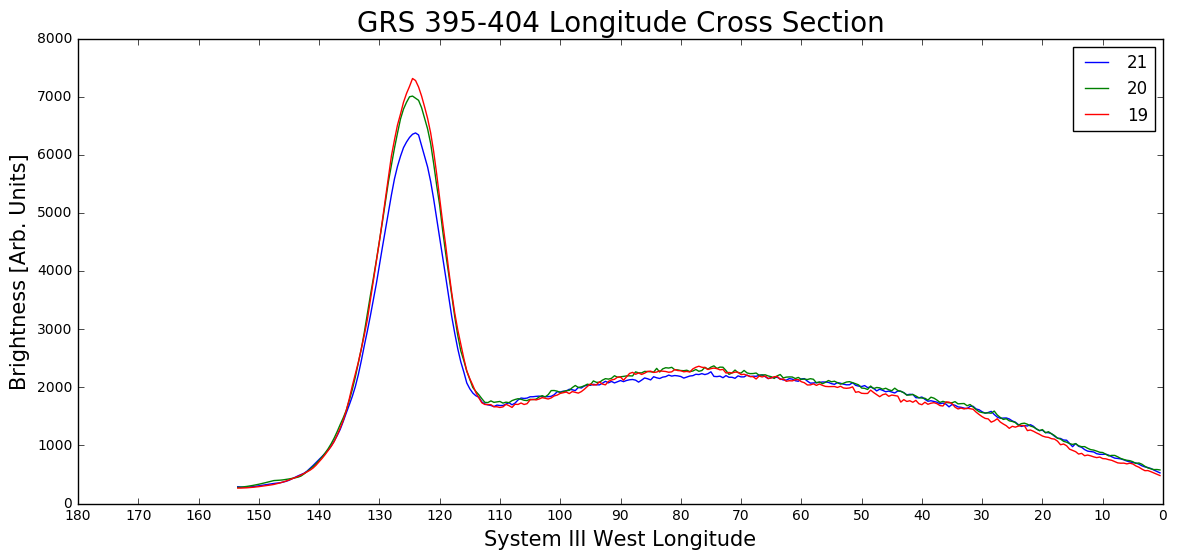

In [43]:
# Extract a longitude scan at a particular latitude
    # GRS is at Lat = -20 degrees North
    
# Map is in 4x resolution, so using 0.5. 
lat=np.arange(-90.,91.,0.5)
lon=np.arange(360.,0.,-0.5)

# Use the following to find if dimension do not line up
    #print(len(lon))
    #print(len(plotdata))
    
# Find and set dimensions
fig,axs=plt.subplots(1,1,figsize=(14,6))
ax=axs

    #ax.plot(lon,plotdata)


 
    
# Plotting the scan for a range of latitudes    
for i in range(3):
    latkeep=(-21)+1*i
    latsel=np.where(lat==latkeep)
    plotdata=pdata[latsel,:].flatten()
    ax.plot(lon,plotdata,label=-latkeep)



# Adjust diagram and labelling    
ax.set_xlim(180,0)
ax.set_xticks(np.arange(180, -1, step=-10))
ax.set_ylim(0,8000)
ax.set_xlabel("System III West Longitude",size=15)
ax.set_ylabel("Brightness [Arb. Units]",size=15)
ax.set_title("GRS 395-404 Longitude Cross Section",size=20)
ax.legend()

fig.savefig("GRS_395-404_long.png")
    
plt.show()


## 4.2 Latitudinal cross-section

[123.]
[124.]
[125.]
[126.]
[127.]
[128.]


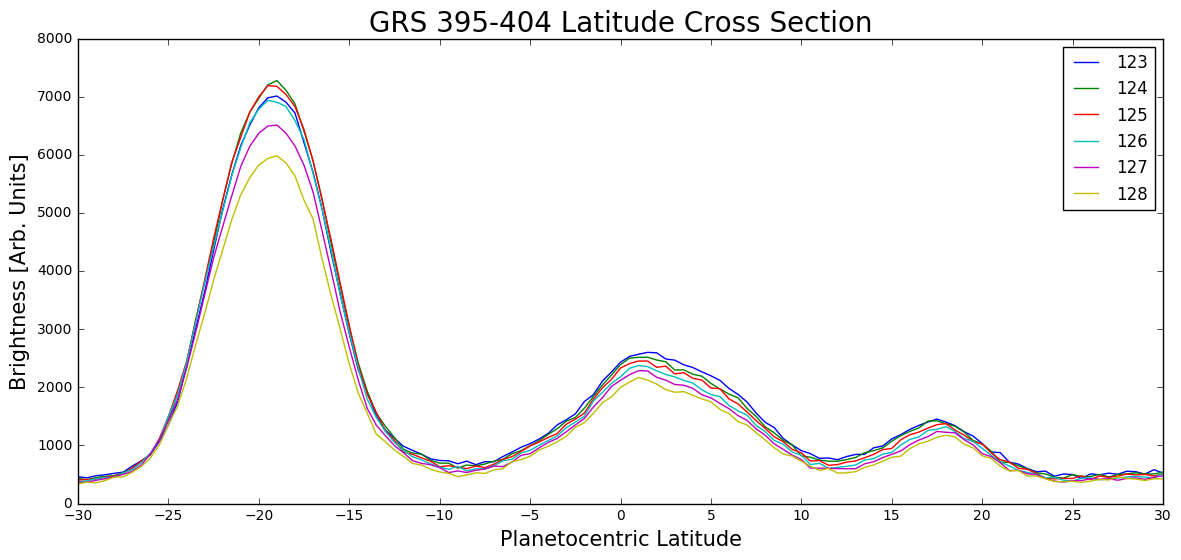

In [44]:
# Extract a latitude scan for a range of chosen longitudes
    # Use prior scan to find range of longitudes for GRS 
    # Highest peak in range of longitudes, is the most accurate location 
    
# Map is in 4x resolution, so using 0.5 
lat=np.arange(-90.,90.,0.5)
lon=np.arange(360.,0.,-0.5)

# Find and set dimensions
fig,axs=plt.subplots(1,1,figsize=(14,6))
ax=axs

    #ax.plot(lon,plotdata)

# Plotting the scan for a range of longitudes  
for i in range(6):
    lonkeep=(123)+1*i
    
    lonsel=np.where(lon==lonkeep)
    print(lon[lonsel])
    plotdata=pdata[:,lonsel].flatten()
    ax.plot(lat,plotdata,label=lonkeep)
    

# Adjust diagram and labelling   
ax.set_xlim(-30,30)
ax.set_xticks(np.arange(-30,31, step=5))
ax.set_ylim(0,8000)
ax.set_xlabel("Planetocentric Latitude",size=15)
ax.set_ylabel("Brightness [Arb. Units]",size=15)
ax.set_title("GRS 395-404 Latitude Cross Section",size=20)
ax.legend()

fig.savefig("GRS_395-404_lat.png")
    
plt.show()

    #GRS found at 124 degrees

## 4.3 Fitting a Gaussian to find GRS Position and Width

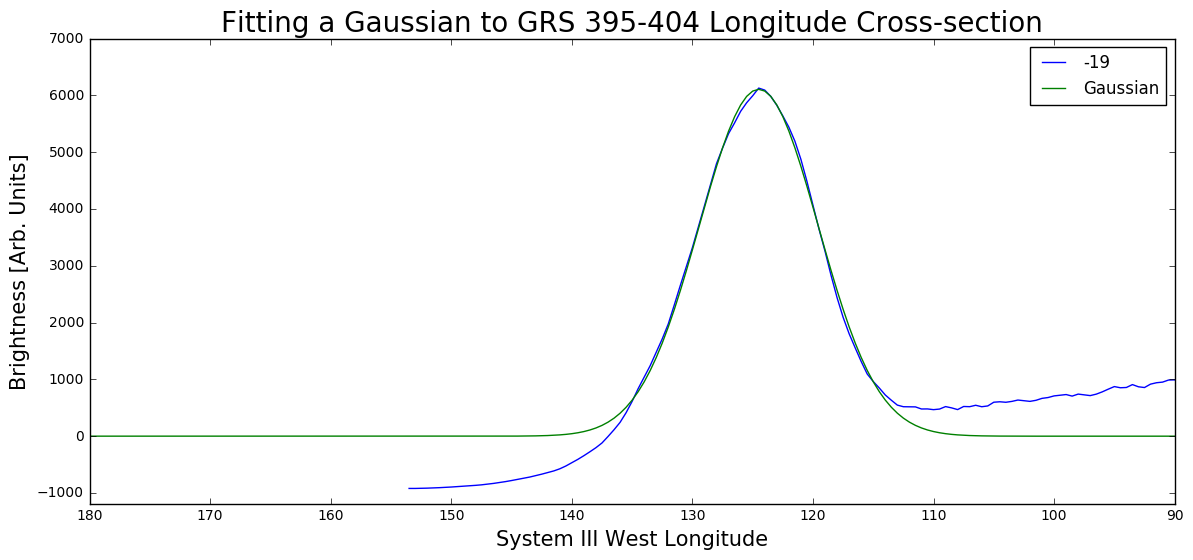

GRS Width (°W):  11.621096153850674
GRS Position (°W):  124.49742696150835
GRS Amplitude:  6105.705876793632


In [46]:
# Extract a longitude scan at a particular latitude
    # GRS is at Lat = -20 degrees North
    
# Map is in 4x resolution, so using 0.5 
lat=np.arange(-90.,91.,0.5)
lon=np.arange(360.,0.,-0.5)

# Use the following to find if dimension do not line up
    #print(len(lon))
    #print(len(plotdata))
    
# Find and set dimensions
fig,axs=plt.subplots(1,1,figsize=(14,6))
ax=axs   

#ax.plot(lon,plotdata)
    
# Plotting the scan for a range of latitudes    
for i in range(1):
    latkeep=(-19)+1*i
    latsel=np.where(lat==latkeep)
    plotdata=pdata[latsel,:].flatten()

# Correct for gaussian offset
lonmean = (plotdata[(360-140)*2]+plotdata[(360-110)*2])/2
plotdata = plotdata - lonmean
ax.plot(lon,plotdata,label=latkeep)
        
# Create a mask
initial_guess=126.
mask = ((lon >= initial_guess-15.) & (lon <= initial_guess+15.))
# Fit the data using a Gaussian - have a rough first guess at the mean
g_init = models.Gaussian1D(amplitude=1., mean=initial_guess, stddev=1)
fit_g = fitting.LevMarLSQFitter()
# Use the mask in the Gaussian fit
g = fit_g(g_init, lon[mask], plotdata[mask])

# Adjust diagram and labelling    
ax.set_xlim(180,90)
ax.set_xticks(np.arange(180, 89, step=-10))
ax.set_ylim(-lonmean,7000)
ax.set_xlabel("System III West Longitude",size=15)
ax.set_ylabel("Brightness [Arb. Units]",size=15)
ax.set_title("Fitting a Gaussian to GRS 395-404 Longitude Cross-section",size=20)

plt.plot(lon, g(lon), label='Gaussian')
ax.legend()
    
plt.show()

fig.savefig("GRS_395-404_gaussian_width.png")

print("GRS Width (°W): ",g.fwhm)
print("GRS Position (°W): ",g.mean.value)
print("GRS Amplitude: ",g.amplitude.value)






## 4.4 Fitting a Gaussian to find GRS height

[125.]


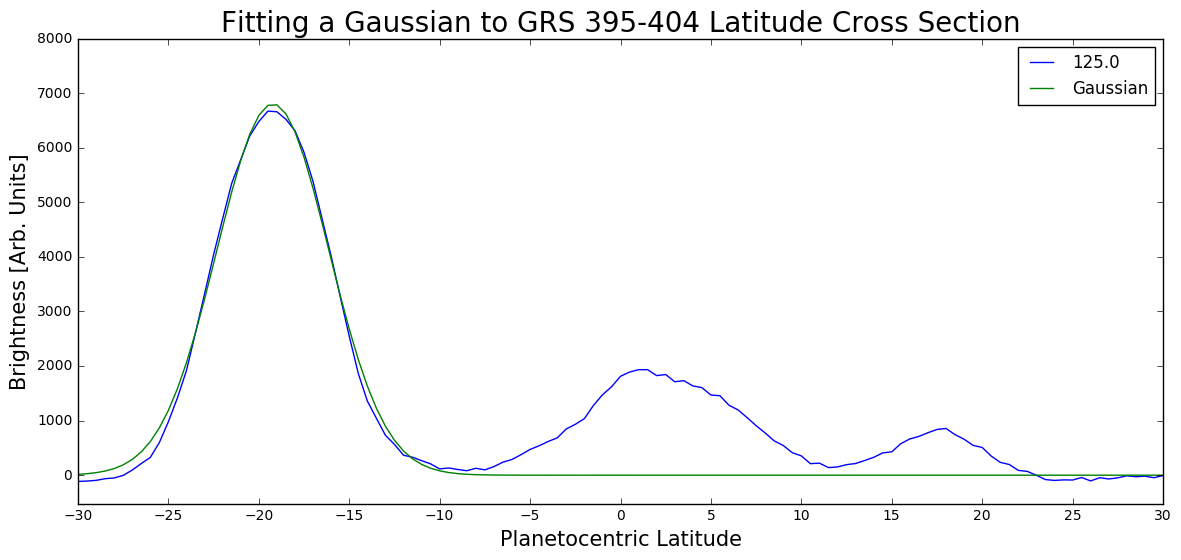

GRS Height (°N):  7.282107637021636
GRS Position (°N):  -19.223591291101076


In [38]:
# Extract a latitude scan for at the longitude position of GRS  
    
# Map is in 4x resolution, so using 0.5 
lat=np.arange(-90.,90.,0.5)
lon=np.arange(360.,0.,-0.5)

# Find and set dimensions
fig,axs=plt.subplots(1,1,figsize=(14,6))
ax=axs

    #ax.plot(lon,plotdata)

# Plotting the scan for the position of the GRS found in section 4.3 
for i in range(1):
    lonkeep=(round(g.mean.value))+1*i
    
    lonsel=np.where(lon==lonkeep)
    print(lon[lonsel])
    plotdata=pdata[:,lonsel].flatten()
    
# Correct for gaussian offset
latmean = (plotdata[160]+plotdata[120])/2
plotdata = plotdata - latmean
ax.plot(lat,plotdata,label=lonkeep)

# Create a mask for latitude
f_initial_guess=-20.
mask = ((lat >= f_initial_guess-5.) & (lat <= f_initial_guess+5.))
# Fit the data using a Gaussian - have a rough first guess at the mean
f_init = models.Gaussian1D(amplitude=1., mean=f_initial_guess, stddev=1)
fit_f = fitting.LevMarLSQFitter()
# Use the mask in the Gaussian fit
f = fit_f(f_init, lat[mask], plotdata[mask])

# Adjust diagram and labelling   
ax.set_xlim(-30,30)
ax.set_xticks(np.arange(-30,31, step=5))
ax.set_ylim(-latmean,8000)
ax.set_xlabel("Planetocentric Latitude",size=15)
ax.set_ylabel("Brightness [Arb. Units]",size=15)
ax.set_title("Fitting a Gaussian to GRS 395-404 Latitude Cross Section",size=20)

plt.plot(lat, f(lat), label='Gaussian')
ax.legend()
    
plt.show()

fig.savefig("GRS_395-404_gaussian_height.png")

print("GRS Height (°N): ",f.fwhm)
print("GRS Position (°N): ",f.mean.value)

In [42]:
import csv

# Opens and writes 
with open('/data/nemesis/hs413-om82/Jupyter Notebook/GRS/2.16 Wavelength/2018/2018data.csv', 'a', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    #writer.writerow(["Dates", "Times", "MJD", "GRS_Long_Position", "GRS_Lat_Position", "GRS_Width", "GRS_Height"])
    
    # Writes date, time, GRS position, GRS width and GRS Height to csv file
    writer.writerow([hdr['DATE_OBS'], hdr['TIME_OBS'], hdr['MJD_OBS'], g.mean[0], f.mean[0], g.fwhm, f.fwhm])